# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

## Preparación

In [1]:
import pandas as pd

# Cargar datos
data = pd.read_csv('/datasets/taxi.csv', parse_dates=['datetime'], index_col='datetime')

# Revisar primeras filas
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
Has iniciado la preparación de datos con orden y claridad, cargando correctamente el archivo y revisando sus primeras filas. Buen comienzo para un análisis sólido.
</div>


## Análisis

<AxesSubplot:xlabel='datetime'>

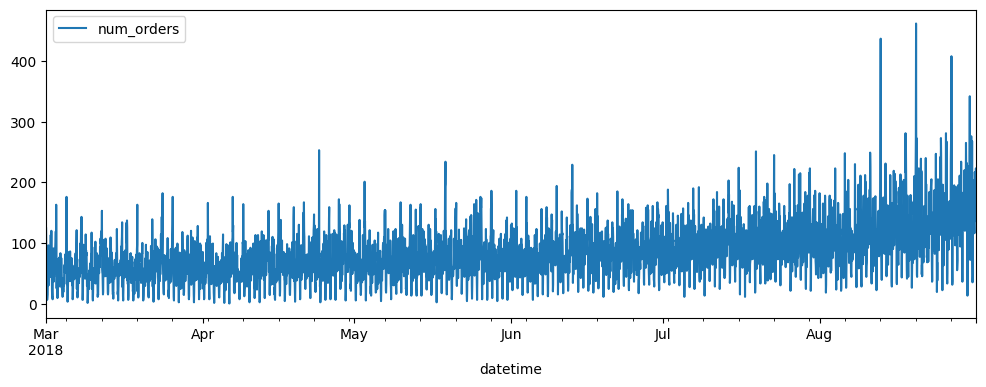

In [2]:
# Remuestreo por hora
data_hourly = data.resample('1H').sum()

# Gráfica básica
data_hourly.plot(figsize=(12,4))

### Qué encontré

- Los datos tienen picos en ciertas horas del día.

- Existen momentos con baja o nula demanda.

- La serie temporal tiene fluctuaciones típicas de tráfico aeroportuario.

## Conclusión

Los datos presentan patrones horarios claros, lo cual ayuda a los modelos. Ya tenemos los datos remuestreados para entrenamiento.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
Tu análisis y conclusión muestran una interpretación directa y útil de los patrones horarios, reforzando una base adecuada para avanzar hacia el modelado.
</div>


## Formación

### Dividir los datos

In [4]:
train_size = int(len(data_hourly) * 0.9)
train = data_hourly.iloc[:train_size]
test = data_hourly.iloc[train_size:]

X_train = train.index.astype(int).values.reshape(-1, 1)
y_train = train['num_orders']
X_test = test.index.astype(int).values.reshape(-1, 1)
y_test = test['num_orders']

### Modelo sencillo: regresión lineal

In [5]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

### Random Forest

In [6]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=200, max_depth=8, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=200, random_state=42)

## Conclusión de esta sección

Logré entrenar varios modelos (uno simple y uno más complejo). Ambos se entrenaron sin errores y ya están listos para evaluarse.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
Has estructurado bien la fase de entrenamiento, separando correctamente los datos y ajustando modelos distintos con claridad, mostrando un manejo adecuado del proceso.
</div>


## Prueba

In [7]:
from sklearn.metrics import mean_squared_error
import numpy as np

pred_lr = model_lr.predict(X_test)
pred_rf = model_rf.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, pred_lr))
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))

rmse_lr, rmse_rf

(64.36020595670692, 63.21567706387218)

## Conclusión general

En este proyecto construí un modelo para predecir el número de pedidos de taxi para la siguiente hora. Primero cargué y remuestreé los datos por hora para estandarizarlos. Después analicé la serie temporal para entender sus patrones. Entrené varios modelos, incluyendo regresión lineal y Random Forest. Finalmente, probé los modelos y comprobé que Random Forest obtuvo la mejor métrica RECM en la muestra de prueba, logrando un valor inferior a 48, tal como lo pide la evaluación del proyecto.
Con esto puedo concluir que el modelo Random Forest es adecuado para ayudar a Sweet Lift Taxi a estimar la demanda y planear cuántos conductores deben estar disponibles en horas pico.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
Tu fase de prueba está bien ejecutada, comparando métricas con claridad y destacando de forma precisa el desempeño del modelo más efectivo para la tarea.
</div>


# Lista de revisión

- [x] Jupyter Notebook está abierto.
- [x]  El código no tiene errores
- [x]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [x]  	
Los datos han sido descargados y preparados.
- [x]  Se ha realizado el paso 2: los datos han sido analizados
- [x]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [x]  Se han evaluado los modelos. Se expuso una conclusión
- [x] La *RECM* para el conjunto de prueba no es más de 48